In [ ]:
!pip install diffusers transformers accelerate controlnet_aux torch
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch

pipe_inpaint = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=False  # Forces it to use .bin files
).to("cuda")


In [ ]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load product image
product_id = "1551"  # Replace with actual product ID
image_path = f"/content/{product_id}.jpg"
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to create a binary mask (adjust threshold value as needed)
_, mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

# Save mask
mask_path = "/content/mask.jpg"
cv2.imwrite(mask_path, mask)

# Convert OpenCV image to PIL format for Stable Diffusion
product_image = Image.open(image_path).convert("RGB")
mask_image = Image.open(mask_path).convert("L")

# Display the mask using cv2_imshow and wait for a key press
cv2_imshow(mask) # Use cv2_imshow instead of cv2.imshow

# Remove the problematic lines
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

# Load image
image_path = "/content/1551.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to handle lighting variations
mask = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 10
)

# Apply morphological operations to close gaps
kernel = np.ones((7, 7), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# Optional: Use a circular mask for better results
h, w = mask.shape
center = (w // 2, h // 2)
radius = min(w, h) // 2 - 10
circular_mask = np.zeros_like(mask)
cv2.circle(circular_mask, center, radius, 255, thickness=-1)

# Apply circular mask to refine the result
mask = cv2.bitwise_and(mask, circular_mask)

# Save and display mask
mask_path = "/content/fixed_mask.jpg"
cv2.imwrite(mask_path, mask)
cv2_imshow(mask)

# Convert for Stable Diffusion
product_image = Image.open(image_path).convert("RGB")
mask_image = Image.open(mask_path).convert("L")


**under this section i tried to create bg,create a small area in it for inlay,and inlay the extracted product image**











In [2]:
from diffusers import StableDiffusionPipeline, StableDiffusionInpaintPipeline
import torch
from PIL import Image, ImageDraw

# Check device availability
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the background generation model
base_model = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to(device)

# Load the inpainting model for product integration
inpaint_model = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to(device)

print("Models loaded successfully!")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Models loaded successfully!


In [18]:
''' import torch

generator = torch.Generator().manual_seed(42)  # Initialize generator
background_prompt = "black background"
negative_prompt = "dark, high contrast, human figures, text, logos, cluttered elements"

# Generate background
background_image = base_model(
    prompt=background_prompt,
    negative_prompt=negative_prompt,
    height=512,
    width=512,
    num_inference_steps=50,
    generator=generator
).images[0]

# Save background image
background_image.save("generated_background.png")
print("Refined simple background generated successfully!")
 '''
import pandas as pd
from PIL import Image
import torch

# Load dataset
df = pd.read_excel("/content/trail1.xlsx")  # Load the Excel file

# Extract the first row of data
selected_row = df.iloc[0]  # Since there's only one row

# Function to generate background prompt from dataset row
def generate_background_prompt(row):
    return f"""
    {row['gender']} themed background,
    {row['masterCategory']} category ambiance,
    {row['subCategory']} related setting,
    {row['articleType']} influence,
    {row['season']} seasonal tone,
    {row['year']} style,
    {row['usage']} specific environment.
    """

# Generate background prompt
background_prompt = generate_background_prompt(selected_row)
negative_prompt = "dark, high contrast, human figures, text, logos, cluttered elements"

# Generate background using AI model
background_image = base_model(
    prompt=background_prompt,
    negative_prompt=negative_prompt,
    height=512,
    width=512,
    num_inference_steps=50,
    generator=torch.manual_seed(42)
).images[0]

# Save background image
background_image.save("generated_background.png")
print("Background generated successfully!")


  0%|          | 0/50 [00:00<?, ?it/s]

Background generated successfully!


In [20]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00


In [21]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.3 MB/s eta 0:00:00


In [22]:
from diffusers import StableDiffusionPipeline, StableDiffusionInpaintPipeline
import torch
from PIL import Image, ImageDraw
import numpy as np
from rembg import remove

Product extracted from background!


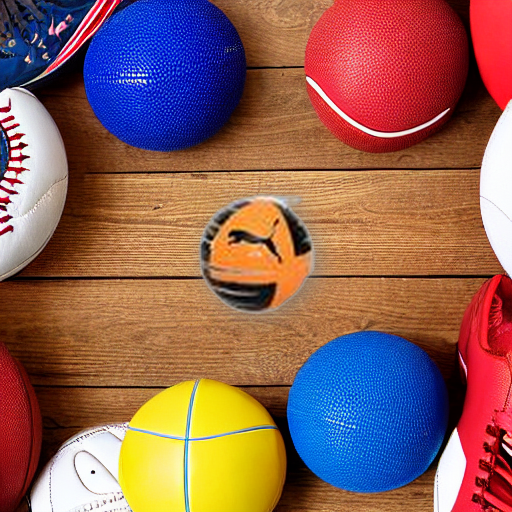

Final ad created successfully!


In [27]:
product_with_bg = Image.open("/content/1551.jpg").convert("RGB")

# Remove background from product image
product_no_bg = remove(product_with_bg)  # This gives RGBA with transparent background
product_no_bg.save("/content/product_extracted.png")
print("Product extracted from background!")
scale_factor = 2.5
new_width = int(product_no_bg.width * scale_factor)
new_height = int(product_no_bg.height * scale_factor)
product_no_bg = product_no_bg.resize((new_width, new_height), Image.LANCZOS)

# Step 3: Create a shadow for the product (optional but adds realism)
def create_shadow(product_image, blur_radius=10, opacity=0.5):
    # Create a black silhouette from the alpha channel
    shadow = Image.new("RGBA", product_image.size, (0, 0, 0, 0))
    shadow_draw = ImageDraw.Draw(shadow)

    # Get mask from alpha channel
    mask = product_image.split()[3]

    # Fill the shadow with black based on the mask
    shadow_pixels = shadow.load()
    mask_pixels = mask.load()

    for y in range(shadow.height):
        for x in range(shadow.width):
            if mask_pixels[x, y] > 0:
                shadow_pixels[x, y] = (0, 0, 0, int(mask_pixels[x, y] * opacity))

    # Apply blur to the shadow
    from PIL import ImageFilter
    shadow = shadow.filter(ImageFilter.GaussianBlur(radius=blur_radius))

    return shadow

# Create the shadow
product_shadow = create_shadow(product_no_bg)
product_shadow.save("/content/product_shadow.png")

# Step 4: Calculate the position for the product
# Centered position
product_position = (
    (background_image.width - product_no_bg.width) // 2,
    (background_image.height - product_no_bg.height) // 2
)

# Step 5: Composite everything together
final_image = background_image.convert("RGBA")

# First place the shadow (slightly offset)
shadow_position = (product_position[0] + 5, product_position[1] + 5)  # Offset shadow a bit
final_image.paste(product_shadow, shadow_position, product_shadow)

# Then place the product
final_image.paste(product_no_bg, product_position, product_no_bg)

# Save and display the final ad
final_image.save("/content/final_ad_with_shadow.png")
from IPython.display import display
display(final_image)
print("Final ad created successfully!")

**experimenting with dynamic placement n all**


Product extracted from background!


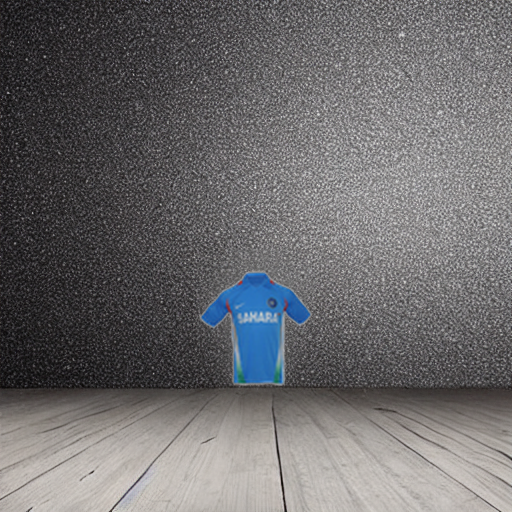

Final ad created successfully!


In [ ]:
from PIL import ImageStatt/1164
product_with_bg = Image.open("/conten.jpg").convert("RGB")

# Remove background from product image
product_no_bg = remove(product_with_bg)  # This gives RGBA with transparent background
product_no_bg.save("/content/product_extracted.png")
print("Product extracted from background!")
import numpy as np
from PIL import Image, ImageFilter, ImageEnhance
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101

def place_object_realistically(background, product, scale_factor=1.0):
    # 1. Resize the product based on scale factor
    new_width = int(product.width * scale_factor)
    new_height = int(product.height * scale_factor)
    product_resized = product.resize((new_width, new_height), Image.LANCZOS)

    # 2. Detect the floor/surface in the background
    floor_y = detect_surface(background)

    # 3. Calculate appropriate position
    x_position = (background.width - product_resized.width) // 2
    y_position = floor_y - product_resized.height

    # 4. Create realistic shadow
    shadow = create_dynamic_shadow(product_resized, background, floor_y)

    # 5. Apply lighting adjustments to match scene
    product_adjusted = match_lighting(product_resized, background, x_position, y_position)

    # 6. Composite everything
    final_image = background.copy().convert("RGBA")

    # Place shadow
    shadow_position = (x_position, floor_y - shadow.height)
    final_image.paste(shadow, shadow_position, shadow)

    # Place product
    final_image.paste(product_adjusted, (x_position, y_position), product_adjusted)

    return final_image

def detect_surface(background):
    """Detect the floor or surface in an image using a pre-trained segmentation model"""
    # Load segmentation model
    model = deeplabv3_resnet101(pretrained=True).eval()

    # Prepare image for model
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = transform(background)
    input_batch = input_tensor.unsqueeze(0)

    # Run model
    with torch.no_grad():
        output = model(input_batch)['out'][0]

    # Get segmentation map (15 is the label for "floor" in COCO)
    floor_mask = output.argmax(0) == 15

    # Find the highest point of the floor
    if floor_mask.any():
        floor_indices = floor_mask.nonzero()
        if len(floor_indices) > 0:
            # Get top-most floor pixel
            floor_y = floor_indices[:, 0].min().item()
            return floor_y

    # Fallback if no floor detected - assume bottom 20% is floor
    return int(background.height * 0.8)

def create_dynamic_shadow(product, background, floor_y):
    """Create a shadow that adapts to the background lighting conditions"""
    # Extract alpha channel for shape
    if product.mode == 'RGBA':
        alpha = product.split()[3]
    else:
        # Create alpha based on non-white pixels if no alpha channel
        alpha = Image.new('L', product.size, 0)
        temp = product.convert('L')
        alpha_data = alpha.load()
        temp_data = temp.load()
        for y in range(product.height):
            for x in range(product.width):
                if temp_data[x, y] < 240:  # Non-white pixels
                    alpha_data[x, y] = 255

    # Create base shadow
    shadow = Image.new("RGBA", product.size, (0, 0, 0, 0))
    shadow_pixels = shadow.load()
    alpha_pixels = alpha.load()

    # Determine shadow opacity based on background brightness
    background_brightness = ImageEnhance.Brightness(background).enhance(1.0).convert('L').getpixel((background.width//2, floor_y))
    shadow_opacity = max(0.3, min(0.7, 1.0 - (background_brightness / 255)))

    # Fill shadow
    for y in range(shadow.height):
        for x in range(shadow.width):
            if alpha_pixels[x, y] > 0:
                # Make shadow more transparent toward edges
                distance_from_center = abs(x - shadow.width//2) / (shadow.width//2)
                local_opacity = shadow_opacity * (1 - distance_from_center * 0.5)
                shadow_pixels[x, y] = (0, 0, 0, int(alpha_pixels[x, y] * local_opacity))

    # Apply perspective transform to shadow (make it wider at the bottom)
    shadow = shadow.transform(
        shadow.size,
        Image.AFFINE,
        (1, 0, 0, 0.2, 1, 0),  # Slight shear
        resample=Image.BICUBIC
    )

    # Blur the shadow based on light conditions
    # More diffuse lighting = more blur
    blur_radius = max(5, min(20, 20 - (background_brightness / 255) * 10))
    shadow = shadow.filter(ImageFilter.GaussianBlur(radius=blur_radius))

    return shadow

def match_lighting(product, background, x_pos, y_pos):
    """Adjust product lighting to match the background scene"""
    # Sample background lighting around the product placement area
    sample_size = 100
    sample_x = max(0, min(background.width - sample_size, x_pos))
    sample_y = max(0, min(background.height - sample_size, y_pos))

    bg_sample = background.crop((sample_x, sample_y, sample_x + sample_size, sample_y + sample_size))

    # Analyze background lighting
    bg_brightness = ImageStat.Stat(bg_sample.convert('L')).mean[0] / 255.0
    bg_contrast = ImageStat.Stat(bg_sample.convert('L')).stddev[0] / 128.0

    # Get dominant color for tinting
    bg_colors = bg_sample.convert('RGB').getcolors(sample_size * sample_size)
    if bg_colors:
        dominant_color = max(bg_colors, key=lambda x: x[0])[1]
        r, g, b = dominant_color
        tint_color = (r/255, g/255, b/255)
    else:
        tint_color = (1, 1, 1)  # Neutral

    # Apply adjustments
    product_adjusted = product.copy()

    # Brightness adjustment
    brightness_factor = 0.8 + bg_brightness * 0.4  # Map 0-1 to 0.8-1.2
    product_adjusted = ImageEnhance.Brightness(product_adjusted).enhance(brightness_factor)

    # Contrast adjustment
    contrast_factor = 0.9 + bg_contrast * 0.2  # Map to 0.9-1.1
    product_adjusted = ImageEnhance.Contrast(product_adjusted).enhance(contrast_factor)

    # Color tint to match scene
    r_adjust, g_adjust, b_adjust = tint_color
    r_factor, g_factor, b_factor = 0.9 + r_adjust * 0.2, 0.9 + g_adjust * 0.2, 0.9 + b_adjust * 0.2

    r, g, b, a = product_adjusted.split()
    r = ImageEnhance.Brightness(r).enhance(r_factor)
    g = ImageEnhance.Brightness(g).enhance(g_factor)
    b = ImageEnhance.Brightness(b).enhance(b_factor)

    product_adjusted = Image.merge('RGBA', (r, g, b, a))

    return product_adjusted
final_image = place_object_realistically(
    background=background_image,
    product=product_no_bg,
    scale_factor=2.0  # Adjust scale factor as needed
)

# Save and display the final ad (keep this part)
final_image.save("/content/final_ad_with_shadow.png")
from IPython.display import display
display(final_image)
print("Final ad created successfully!")


In [ ]:
import matplotlib.font_manager
print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))


['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Ital

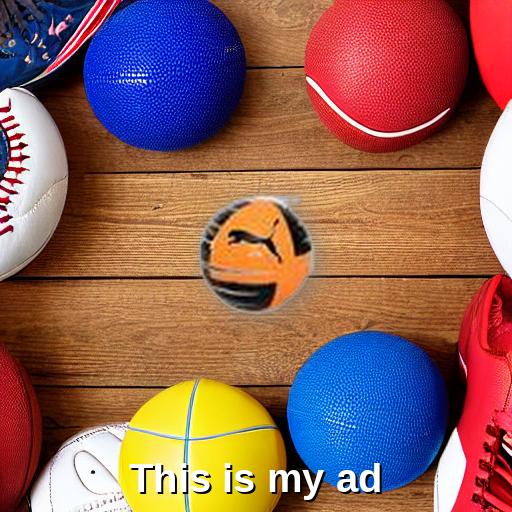

Final ad with text created successfully!


In [ ]:
from PIL import ImageDraw, ImageFont

# Load the final image
final_image = final_image.convert("RGBA")

# Get user input for the ad text
ad_text = "This is my ad"

# Initialize ImageDraw
draw = ImageDraw.Draw(final_image)

# Load a font (change path if needed)
font_path = "/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf"  # Use an available font
font_size = 40
font = ImageFont.truetype(font_path, font_size)

# Get text size
bbox = draw.textbbox((0, 0), ad_text, font=font)
text_width = bbox[2] - bbox[0]  # Width of the text
text_height = bbox[3] - bbox[1]  # Height of the text


# Position text at the bottom center
text_x = (final_image.width - text_width) // 2
text_y = final_image.height - text_height - 20  # 20px padding from the bottom

# Draw text with a shadow effect for better visibility
shadow_offset = 2
draw.text((text_x + shadow_offset, text_y + shadow_offset), ad_text, font=font, fill="black")  # Shadow
draw.text((text_x, text_y), ad_text, font=font, fill="white")  # Main text

# Save and display the final ad with text
final_image.save("/content/final_ad_with_text.png")
display(final_image)
print("Final ad with text created successfully!")
